## **Intro to NLP (Natural Language Processing): Week 4 - Deep Dive 3**

Code implementations for below topics using gensim, nltk, spacy:

1. Google pre-trained word2vec model exploration using gensim, nltk
2. Build Document similarity model using pre-trainedd word2vec model using gensim 
3. Train own word2vec model using news dataset using gensim, nltk
4. Implememtattion of gloVe model using SpaCy

Dataset Link - https://www.kaggle.com/snapcrack/all-the-news

Dataset Name - articles1.csv (50,000 news articles)

Dataset Description - News articles from 5 American publications


**Steps to access, download, and use the Kaggle dataset:**

1. Access the above link to kaggle, click on "Data" tab and download "articles1.csv(194.11 MB)" the dataset.
2. Once downloaded, click on the file to unzip it
3. Save the file in a folder easily accessible - E.g. "Documents"
4. Open a Google Colab Notebook
5. In the left pane of  the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")
6. You are ready to start using the data in the Colab Notebook.

Data location within Colab: '/content/articles1.csv'

**Steps to download the pre-trained Google News word2vec model (will take a while)**

1. Click and dowload with this link - https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
2. OR run the below code in the command line

```
!wget -P /content/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
```
*Connect back with me WWCode #nlp channel if you have trouble loading this model

### **Downloading the google word2vec model**

In [1]:
!wget -P /content/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-08-01 14:37:46--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.20.51
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.20.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/content/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  32.8MB/s    in 63s     

2020-08-01 14:38:49 (24.9 MB/s) - ‘/content/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



#### **How to check which folder the google colab is located in?**

In [2]:
pwd

'/content'

#### **Now that we know which folder, how to see if the data we loaded in Step 5 above is correctly loaded or not?**

In [3]:
ls

articles1.csv  GoogleNews-vectors-negative300.bin.gz  sample_data/


In [2]:
from time import time
import pandas as pd
import numpy as np
import re
import sys
import csv
csv.field_size_limit(sys.maxsize)

!pip install gensim
from gensim.models import KeyedVectors

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

import itertools
import datetime

import pprint
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Exploring word2vec pre-trained news vector**

Refer to gensim documentation here for all pre-trained models
https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html

In [3]:
pathToGoogleBinVec = '/content/GoogleNews-vectors-negative300.bin.gz'

w2v_model = KeyedVectors.load_word2vec_format(pathToGoogleBinVec, binary=True)
print("word2vec google news vector loaded successfully")

word2vec google news vector loaded successfully


In [6]:
# Length of vocabulary 

print(f"There are {len(w2v_model.vocab)} unique words in the vocab")

There are 3000000 unique words in the vocab


In [7]:
# Few sample words (200) from the vocab

print(w2v_model.index2word[100:120])


['company', 'any', 'team', 'against', 'off', 'This', 'most', 'made', 'through', 'make', 'second', 'state', 'well', 'day', 'season', 'says', 'week', 'where', 'while', 'down']


In [8]:
# if you want to check some of the multi-words withing first 2K embeddings
# '\w+(?:_\w+)+' regex looks for tokens with underscore(_) in them

count=0
while count<2000:
    a = re.findall(r'\w+(?:_\w+)+',w2v_model.index2word[count])
    if not a:
        pass
    else:
        print(a)
    count+=1

['New_York']
['United_States']
['per_cent']
['Associated_Press']
['Los_Angeles']
['health_care']
['looking_statements']
['White_House']
['High_School']
['e_mail']
['vice_president']
['World_Cup']
['Web_site']
['chief_executive']
['New_Zealand']


In [9]:
#Obtain vectors for terms from the model

vec_car = w2v_model['car']
print(vec_car)

[ 0.13085938  0.00842285  0.03344727 -0.05883789  0.04003906 -0.14257812
  0.04931641 -0.16894531  0.20898438  0.11962891  0.18066406 -0.25
 -0.10400391 -0.10742188 -0.01879883  0.05200195 -0.00216675  0.06445312
  0.14453125 -0.04541016  0.16113281 -0.01611328 -0.03088379  0.08447266
  0.16210938  0.04467773 -0.15527344  0.25390625  0.33984375  0.00756836
 -0.25585938 -0.01733398 -0.03295898  0.16308594 -0.12597656 -0.09912109
  0.16503906  0.06884766 -0.18945312  0.02832031 -0.0534668  -0.03063965
  0.11083984  0.24121094 -0.234375    0.12353516 -0.00294495  0.1484375
  0.33203125  0.05249023 -0.20019531  0.37695312  0.12255859  0.11425781
 -0.17675781  0.10009766  0.0030365   0.26757812  0.20117188  0.03710938
  0.11083984 -0.09814453 -0.3125      0.03515625  0.02832031  0.26171875
 -0.08642578 -0.02258301 -0.05834961 -0.00787354  0.11767578 -0.04296875
 -0.17285156  0.04394531 -0.23046875  0.1640625  -0.11474609 -0.06030273
  0.01196289 -0.24707031  0.32617188 -0.04492188 -0.114257

In [10]:
# word2vec Cannot handle OOV words that is not embbedded in model
try:
    word = 'cameroon'
    vec = w2v_model[word]
except KeyError:
    print(f"The word {word} does not appear in this model")

The word cameroon does not appear in this model


In [11]:
try:
    word = 'brexit'
    vec = w2v_model[word]
except KeyError:
    print(f"The word {word} does not appear in this model")

The word brexit does not appear in this model


In [12]:
# Word2Vec supports several word similarity tasks 

pairs = [
    ('car', 'minivan'),   
    ('car', 'bicycle'),  
    ('car', 'airplane'),  
    ('car', 'drone'), 
    ('car', 'cereal'), 
    ('car', 'communism')]

for w1, w2 in pairs:
    print('%r and %r \tsimilarity score is\t%.3f' % (w1, w2, w2v_model.similarity(w1, w2)))

'car' and 'minivan' 	similarity score is	0.691
'car' and 'bicycle' 	similarity score is	0.536
'car' and 'airplane' 	similarity score is	0.424
'car' and 'drone' 	similarity score is	0.142
'car' and 'cereal' 	similarity score is	0.139
'car' and 'communism' 	similarity score is	0.058


In [13]:
# since car and minivan had the most similarity in above example, let's see which other words are related to them

pprint.pprint(w2v_model.most_similar(positive=['car', 'minivan'], topn=10))

[('SUV', 0.853219211101532),
 ('vehicle', 0.8175784349441528),
 ('pickup_truck', 0.7763689160346985),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.756571888923645),
 ('sedan', 0.7446292638778687),
 ('station_wagon', 0.7440938949584961),
 ('Honda_Civic', 0.7440057396888733),
 ('Nissan_Altima', 0.7391073703765869),
 ('Ford_Taurus', 0.7306575775146484)]


In [15]:
# you could also get most similar per token

w2v_model.most_similar('car')

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423830032348633),
 ('SUV', 0.7160962820053101),
 ('minivan', 0.6907036304473877),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.662684977054596),
 ('Jeep', 0.6511331796646118),
 ('pickup_truck', 0.64414381980896)]

In [16]:
# most similar words with positive re-affirmations to the words you want it to be closely related with

pprint.pprint(w2v_model.most_similar(positive=['king', 'royal'], topn=10))

[('monarch', 0.7467336654663086),
 ('prince', 0.7213603258132935),
 ('royals', 0.7089868783950806),
 ('queen', 0.6958334445953369),
 ('princes', 0.6781231164932251),
 ('crown_prince', 0.6633656024932861),
 ('kings', 0.6616665124893188),
 ('monarchy', 0.6258724927902222),
 ('sultan', 0.6217681169509888),
 ('palace', 0.6200119256973267)]


In [17]:
pprint.pprint(w2v_model.most_similar(positive=['egg', 'meat'], topn=10))

[('eggs', 0.7468311190605164),
 ('chicken', 0.7329204678535461),
 ('pork', 0.6527470350265503),
 ('meats', 0.6421541571617126),
 ('beef', 0.6267613172531128),
 ('veal', 0.6215294599533081),
 ('turkey', 0.620357871055603),
 ('poultry', 0.6129070520401001),
 ('lamb', 0.6059913635253906),
 ('grilled_herbed', 0.5847586393356323)]


In [18]:
w2v_model.most_similar('politics')

[('partisan_politics', 0.6832237243652344),
 ('Politics', 0.6740255355834961),
 ('political', 0.6718930602073669),
 ('politcs', 0.6221948266029358),
 ('poltics', 0.5941637754440308),
 ('Lisa_Vorderbrueggen_covers', 0.5866053700447083),
 ('partisanship', 0.5735563039779663),
 ('politicians', 0.5705571174621582),
 ('politician', 0.5695300102233887),
 ('politicking', 0.5680171847343445)]

In [19]:
# to find the odd-one out basically

print(w2v_model.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


In [20]:
print(w2v_model.doesnt_match(['king', 'sultan', 'farmer', 'royal', 'queen', 'ruler']))

farmer


In [21]:
# similarity score between sequence of words 

sim = w2v_model.n_similarity(['sushi', 'store'], ['japanese', 'restaurant'])
print("{:.2f}".format(sim))

0.60


In [22]:
#Get the entity from entities_list most similar to entity1

w2v_model.most_similar_to_given('food', ['buddhist','fuji', 'sushi','tea'])


'sushi'

In [23]:
# Get similarity between sentence vectors transformed as list

s1 = 'This room is dirty'
s2 = 'dirty disgusting dorm'

sim = w2v_model.n_similarity(s1.lower().split(), s2.lower().split())
print("The similarity score between s1 & s2 is {:.2f}".format(sim))

The similarity score between s1 & s2 is 0.59


In [24]:
# difference between cosine and word mover similarity for similar sentences

sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()

#normalizing the model for WM

w2v_model.init_sims(replace=True)

# Remove Stopwords
sentence_obama = [w for w in sentence_obama if w not in stopwords]
sentence_president = [w for w in sentence_president if w not in stopwords]

cosine_sim = w2v_model.n_similarity(sentence_obama, sentence_president)
wm_sim = w2v_model.wmdistance(sentence_obama, sentence_president)


print(f"The cosine score between s1 & s2 is {cosine_sim:.2f}\nThe word mover score between s1 & s2 is {wm_sim:2f}")

The cosine score between s1 & s2 is 0.63
The word mover score between s1 & s2 is 1.017465


### Visualizing the google w2v model using t-SNE (T-distributed Stochastic Neighbor Embedding)

In [25]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for n_components dimensions
    tsne = TSNE(n_components=n, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    # display scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    
    plt.show()

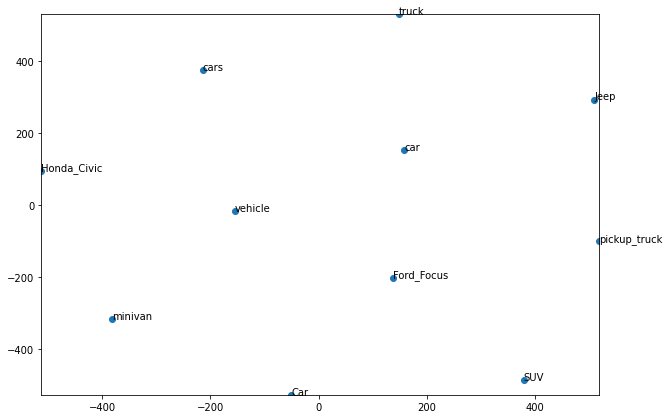

In [26]:
display_closestwords_tsnescatterplot(w2v_model, 'car', 2)

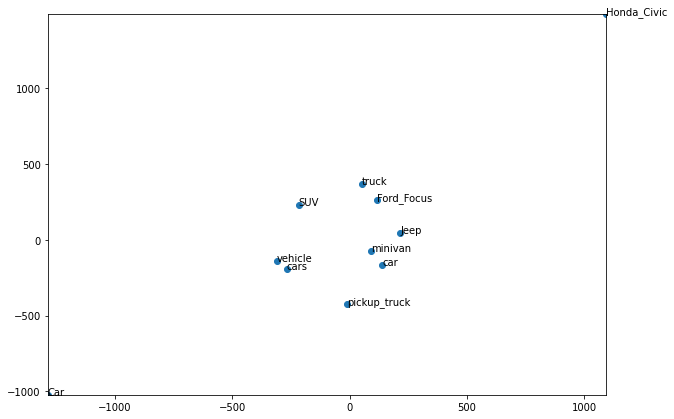

In [27]:
display_closestwords_tsnescatterplot(w2v_model, 'car', 3)

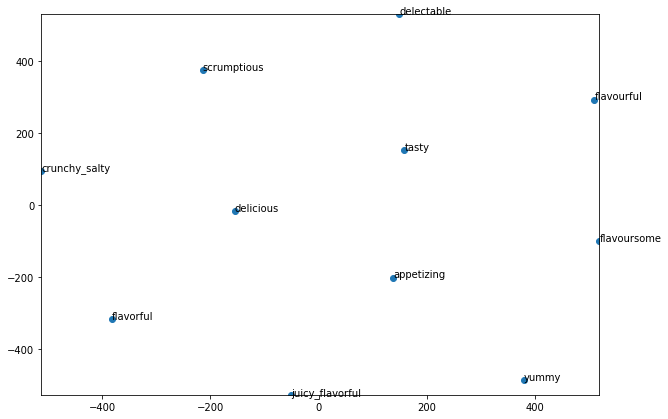

In [28]:
display_closestwords_tsnescatterplot(w2v_model, 'tasty', 2)

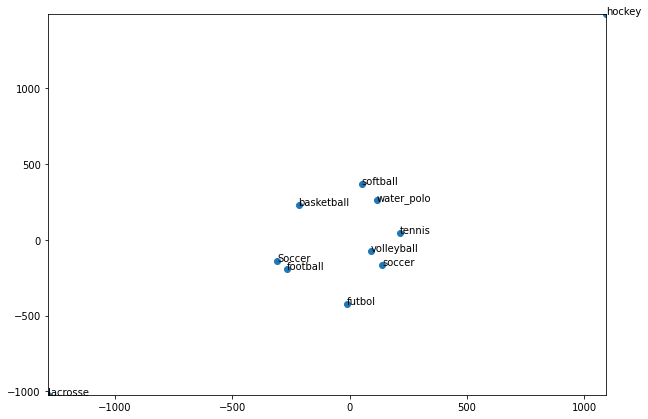

In [29]:
display_closestwords_tsnescatterplot(w2v_model, 'soccer', 3)

### **Now that we have explored the pre-trained model, let's fit it into our Kaggle News dataset**

### Load .csv dataset into a pandas dataframe

In [3]:
# reading the csv into a pandas dataframe

cols=['num','id','title','publication', 'author', 'date', 'year', 'month', 'url', 'content']

news_articles_df = pd.read_csv('/content/articles1.csv', engine = 'python', usecols=cols, header=0, nrows = 5000)

#csv data may have trailing and leading spaces
news_articles_df = news_articles_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

# Removing empty rows from csv if any
news_articles_df.dropna(axis=0, how='all',inplace=True)
nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns after removing empty rows')

news_articles_df.head()

There are 5000 rows and 10 columns
There are 5000 rows and 10 columns after removing empty rows


,num,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
# Removing the bad lines by checking in the column 'num' (which is just a serial number is type int or not, if not then assuming it's a bad link and removing it from df)

news_articles_df = news_articles_df[pd.to_numeric(news_articles_df['num'], errors='coerce').notnull()]

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 5000 rows and 10 columns


,num,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


### **Describe the data**

In [5]:
# getting basic info about the dataset

news_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          5000 non-null   int64  
 1   id           5000 non-null   int64  
 2   title        5000 non-null   object 
 3   publication  5000 non-null   object 
 4   author       4973 non-null   object 
 5   date         5000 non-null   object 
 6   year         5000 non-null   float64
 7   month        5000 non-null   float64
 8   url          0 non-null      float64
 9   content      5000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 429.7+ KB


In [6]:
# checking for null values, if any

news_articles_df.isnull().sum()

num               0
id                0
title             0
publication       0
author           27
date              0
year              0
month             0
url            5000
content           0
dtype: int64

### For the next phase of analysis, we will consider only the "title" column

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# initializing a new dataframe with only the title column for faster operation 

title_df = news_articles_df['title']
title_df = title_df.to_frame()

title_df.sample(10, random_state = 5)

,title
27,Inside Trump Defense Secretary Pick’s Efforts ...
1482,Trump May Give the Pentagon More Authority to ...
3021,"Anton Yelchin, ‘Star Trek’ Actor, Dies at 27 -..."
3867,Researchers Confront an Epidemic of Loneliness...
637,Sympathy for the Blue Devils? Maybe This Year ...
4191,"Google, Lagging Amazon, Races Across the Thres..."
3042,"What J. Dennis Hastert, Ex-House Speaker, Will..."
775,"New England Patriots, Rex Tillerson: Your Wedn..."
3767,Can the Old Masters Be Relevant Again? - The N...
3954,Value-Seekers Warm to a $450 Annual Credit Car...


In [9]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
title_df['title'] = title_df['title'].str.lower()
title_df['title'] = title_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

title_df.sample(10, random_state = 5)

,title
27,inside trump defense secretary picks efforts t...
1482,trump may give the pentagon more authority to ...
3021,anton yelchin star trek actor dies at 27 the ...
3867,researchers confront an epidemic of loneliness...
637,sympathy for the blue devils maybe this year ...
4191,google lagging amazon races across the thresho...
3042,what j dennis hastert exhouse speaker will fac...
775,new england patriots rex tillerson your wednes...
3767,can the old masters be relevant again the new...
3954,valueseekers warm to a 450 annual credit card ...


In [10]:
#tokenize
title_df['tokenized_title'] = title_df['title'].apply(word_tokenize)
title_df.sample(10, random_state = 5)

,title,tokenized_title
27,inside trump defense secretary picks efforts t...,"[inside, trump, defense, secretary, picks, eff..."
1482,trump may give the pentagon more authority to ...,"[trump, may, give, the, pentagon, more, author..."
3021,anton yelchin star trek actor dies at 27 the ...,"[anton, yelchin, star, trek, actor, dies, at, ..."
3867,researchers confront an epidemic of loneliness...,"[researchers, confront, an, epidemic, of, lone..."
637,sympathy for the blue devils maybe this year ...,"[sympathy, for, the, blue, devils, maybe, this..."
4191,google lagging amazon races across the thresho...,"[google, lagging, amazon, races, across, the, ..."
3042,what j dennis hastert exhouse speaker will fac...,"[what, j, dennis, hastert, exhouse, speaker, w..."
775,new england patriots rex tillerson your wednes...,"[new, england, patriots, rex, tillerson, your,..."
3767,can the old masters be relevant again the new...,"[can, the, old, masters, be, relevant, again, ..."
3954,valueseekers warm to a 450 annual credit card ...,"[valueseekers, warm, to, a, 450, annual, credi..."


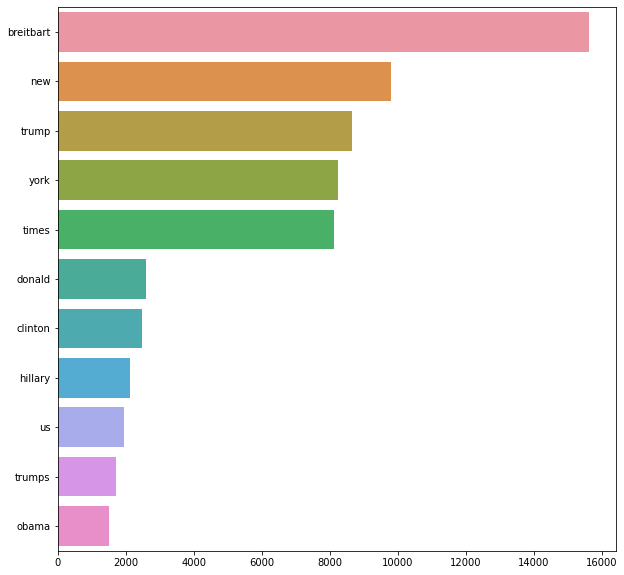

In [46]:
#checking non stop word lists

import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(content_df['title'])

In [47]:
from operator import itemgetter 
import math

def input_data(title_df):

    #INPUT - batch of 10 titles
    documents_batch1 = [x for x in title_df['title'].sample(10, random_state = 5) if str(x) != 'nan']
    print("Number of title documents set 1:",len(documents_batch1))


    #INPUT - batch of 10 titles
    documents_batch2 = [x for x in title_df['title'].sample(10, random_state = 9) if str(x) != 'nan']
    print("Number of title documents set 2:",len(documents_batch2))

    return documents_batch1, documents_batch2


def ConvertWV_To_AvgSentVec(VectorSet, ignore = []):
    if len(ignore) == 0: 
        return np.mean(VectorSet, axis = 0)
    else: 
        return np.dot(np.transpose(VectorSet), ignore)/sum(ignore)

def SentToVec(sent, w2v_model, stop):
    stopwords=stop.words('english')

    frequent_words_title = ['brietbart', 'cnn','new', 'york', 'times']
    stopwords.extend(frequent_words_title)
    stopwords=set(stopwords)
    #print(stopwords)

    sent = sent.lower()
    words_in_sent = [word for word in sent.split() if word not in stopwords if word.isalpha()]
    VectorSet = []
    for w in words_in_sent:
        try:
          word_vec=w2v_model[w]
          VectorSet.append(word_vec)
        except:
          pass
    return ConvertWV_To_AvgSentVec(VectorSet)


def CosineSimilarity(sentVector1, sentVector2):
    cosine_similarity = np.dot(sentVector1, sentVector2) / (np.linalg.norm(sentVector1) * np.linalg.norm(sentVector2))
    try:
        if math.isnan(cosine_similarity):
          cosine_similarity=0
    except:
      cosine_similarity=0
    return cosine_similarity


def matrix_calc(title_df, w2v_model, stop):
    count=0
    matrix_final=list()
    
    news1, news2 = input_data(title_df)

    for i in news1:
        for j in news2:
            sentVector1 = SentToVec(i, w2v_model, stop)
            sentVector2 = SentToVec(j, w2v_model, stop)

            sim_score  = CosineSimilarity(sentVector1, sentVector2)
            #print(sim_score)
            tup=(i,j,sim_score)
            
            matrix_final.append(tup)
    print("\n")
    print("Computed matrix length is = ",(len(matrix_final)))
    
    return matrix_final

def sorted_matrix(title_df, w2v_model, stop):
    sim_matrix = matrix_calc(title_df, w2v_model, stop)
    
    sort_matrix=sorted(sim_matrix, key=lambda x: x[2], reverse=True)
    print("Sorted matrix length is = ",(len(sort_matrix)))
    
    # with open('word2vec-news-sim.csv', "w") as the_file:
    #     csv.register_dialect("custom", delimiter=",", skipinitialspace=True)
    #     writer = csv.writer(the_file, dialect="custom")
    #     writer.writerow(['news_content1','news_content2','Similarity_Score'])
    #     for tup in sort_matrix:
    #         writer.writerow(tup)
    # print("Saved result csv file")
    
    return sim_matrix

def main(title_df, w2v_model, stop):
    sim_matrix = sorted_matrix(title_df, w2v_model, stop)
    
    max_score = max(sim_matrix, key = itemgetter(2))
    
    print("\n")
    print(f"Max word2vec similarity score = {max_score[2]}")
    print(f"News text1 is: {max_score[0]}")
    print(f"News text2 is: {max_score[1]}")
    
    min_score = min(sim_matrix, key = itemgetter(2))

    print("\n")
    print(f"Min word2vec similarity score = {min_score[2]}")
    print(f"News title1 is: {min_score[0]}")
    print(f"News title2 is: {min_score[1]}")
    

In [48]:
main(title_df, w2v_model, stopwords)

Number of title documents set 1: 10
Number of title documents set 2: 10


Computed matrix length is =  100
Sorted matrix length is =  100


Max word2vec similarity score = 0.6482330560684204
News text1 is: gop congressman says spicer needs to go after hitler comments
News text2 is: hillary clinton campaign spins trump 2nd amendment comments as threat  breitbart


Min word2vec similarity score = 0.07059299200773239
News title1 is: orlando gunman visited club on night of attack left and returned
News title2 is: eu increases brexit bill demand to 100 billion up from 60 billion


### Let's visualize similar words using t-SNE from our kaggle dataset

In [17]:
similar_words = {search_term: [item[0] for item in w2v_model.most_similar([search_term], topn=5)]
                  for search_term in ['campaign', 'funds', 'clinton','donald','election','gunman']}
pprint.pprint(similar_words)

{'campaign': ['campaigns', 'cam_paign', 'campagin', 'campaing', 'camapign'],
 'clinton': ['obama', 'mccain', 'hillary', 'barack_obama', 'reagan'],
 'donald': ["o'brien", 'gibbs', 'nigel', 'bennett', 'dave'],
 'election': ['elections',
              'Election',
              'electoral',
              'reelection',
              'parliamentary_elections'],
 'funds': ['fund', 'monies', 'Funds', 'money', 'funding'],
 'gunman': ['lone_gunman',
            'assailant',
            'masked_gunman',
            'gunmen',
            'shooting_rampage']}


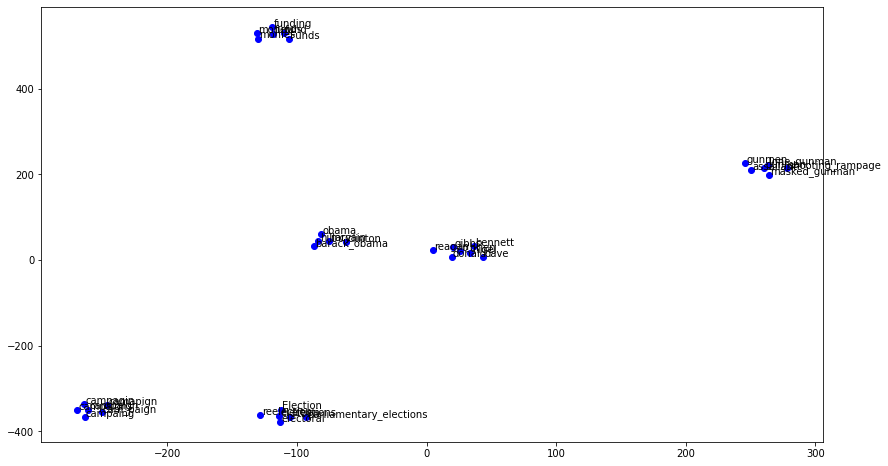

In [18]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='blue', edgecolors='b')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### **Applying GloVe features using spaCy**

In [57]:
!pip install spacy
#!python -m spacy download en_core_web_sm

# Download the following language model and store it in disk
#https://github.com/explosion/spacy-models/releases/tag/en_vectors_web_lg-2.0.0

!python -m spacy download en_vectors_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


After loading the  spacy vector model, you might need to restart colab runtime, other wise it will show model not found. To do that:

**Click on "Runtime" on top -- "Restart Runtime" -- Then run the below cell**

In [11]:
import spacy
nlp = spacy.load('en_vectors_web_lg')
nlp

In [12]:
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [15]:
unique_words = list(set([word for sublist in [doc.split() for doc in title_df['title'][:100]] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
works,-0.002837,0.029502,-0.078415,-0.276090,-0.341390,0.252280,-0.325580,-0.349490,0.135360,2.218700,-0.149710,0.313510,-0.181080,-0.242970,0.140230,-0.055311,-0.231960,1.41990,-0.104070,-0.152250,0.264440,0.267710,-0.355790,-0.048702,0.24618,-0.037127,0.50355,-0.122940,0.157920,0.085547,0.182600,0.152850,-0.099447,-0.400250,0.149020,-0.245540,-0.111290,-0.290790,0.116660,0.067813,...,0.765830,0.202370,-0.065823,0.040868,-0.044382,-0.054391,0.084555,-0.462960,0.784570,0.043525,0.418540,-0.316650,-0.303310,0.391040,0.277290,-0.265920,0.30314,-0.061621,0.183930,0.403430,-0.249600,0.158860,-0.023381,-0.025549,-0.088291,-0.165970,0.282310,0.071909,0.013861,-0.520130,-0.442200,-0.53159,0.299950,0.45087,0.070206,-0.143590,0.571500,-0.278580,-0.108280,0.307910
may,-0.042501,0.090773,-0.119180,0.123720,-0.193020,-0.162020,-0.130180,-0.300500,-0.205990,2.740000,-0.093065,0.043172,0.380660,0.088864,-0.154110,-0.123340,0.131090,1.67460,-0.255810,0.213840,-0.222840,-0.252740,-0.435910,-0.104770,0.24501,0.489380,-0.33120,-0.341850,-0.118940,-0.211980,-0.445980,-0.245480,-0.005495,0.230280,-0.066600,0.157810,0.154620,0.184800,-0.135990,-0.266040,...,0.289820,-0.085439,-0.375050,0.421850,0.030911,0.690250,0.193040,0.400270,0.824380,-0.069521,0.449250,0.315330,0.098880,-0.096880,0.024116,0.039189,-0.43242,0.236840,-0.010036,0.386830,0.403920,0.199120,0.311490,0.148710,-0.036211,0.025870,0.066883,0.056364,0.653600,0.032752,-0.504890,0.36898,-0.397370,-0.19212,0.254850,0.108880,-0.326820,-0.560680,0.191770,-0.029525
taste,-0.131860,0.222230,0.183800,-0.228460,-0.141340,0.393840,0.112050,0.208220,-0.024317,1.775100,-0.393270,0.067861,-0.697990,0.010518,0.824000,-0.434120,-0.088987,0.88444,0.035271,0.304760,0.348830,-0.351520,0.257220,-0.389020,0.33282,-0.430660,0.40668,-0.165880,-0.027485,-0.351960,0.003382,-0.005301,0.067903,-0.235530,-0.005170,0.463180,0.141400,-0.071258,0.227470,0.363180,...,-0.309920,-0.414720,0.003341,0.243370,0.192400,0.360090,-0.288860,-0.010488,-0.015053,0.410070,-0.079931,0.154130,0.063717,-0.326570,-0.274160,0.147940,0.17074,-0.050391,0.096538,0.891200,-0.005800,0.055793,0.206120,-0.237610,-0.652820,0.323080,1.145100,0.215870,-0.007434,0.187170,0.110510,0.11577,-0.921830,-0.26543,-0.368270,0.080226,-0.075399,-0.680080,0.218130,0.381240
sec,-0.385040,0.697640,-0.055133,-0.440280,0.187840,-0.194940,0.146130,-0.075708,0.341630,0.020873,-0.198440,-0.370510,0.420190,-0.586650,-0.045131,0.452640,0.076866,1.54980,-0.863240,-0.165400,0.148230,0.319340,0.343020,-0.979990,-0.32046,0.139190,0.29842,-0.270550,0.047859,0.164690,0.315160,-0.127650,0.616470,-0.246300,-0.037678,-0.577610,0.249450,0.324660,-0.534210,0.447360,...,0.118980,0.121020,0.259050,-0.139330,0.190970,-0.356430,0.140520,-0.178150,0.231120,-0.133040,0.365270,0.076235,-0.172020,-0.452960,-0.111550,0.591930,-0.77933,-0.208910,0.052262,0.073129,-0.260150,-0.378020,-0.009844,0.156230,0.183860,0.032864,-0.242380,-0.827870,0.145920,0.534910,0.310880,-0.59740,0.074449,-0.35637,0.164200,0.175990,-0.383450,-0.244550,-0.371590,0.534160
thwarted,0.125450,-0.234450,0.390140,0.094535,-0.531470,0.203750,-0.154370,0.429340,-0.039480,2.136100,0.008845,-0.402410,-0.345000,0.073011,-0.040514,0.052260,0.294180,-0.98488,0.570670,0.314000,-0.252870,-0.255310,-0.051215,0.093694,-0.25875,0.072876,0.22445,0.085401,-0.143300,0.190640,-0.189030,0.042595,-0.564300,0.321690,0.305380,-0.015816,0.444510,0.049337,0.229510,0.198820,...,-0.180600,0.286510,-0.034025,-0.257590,-0.243390,0.409100,-0.165130,0.165060,-0.638020,0.038333,0.118590,0.312150,-0.121070,-0.060647,-0.202870,0.212580,-0.23388,-0.204940,0.402010,0.214550,0.007316,-0.123180,0.507880,0.590770,0.291380,0.311140,0.194930,0.314990,0.024832,-0.018793,-0.093371,0.

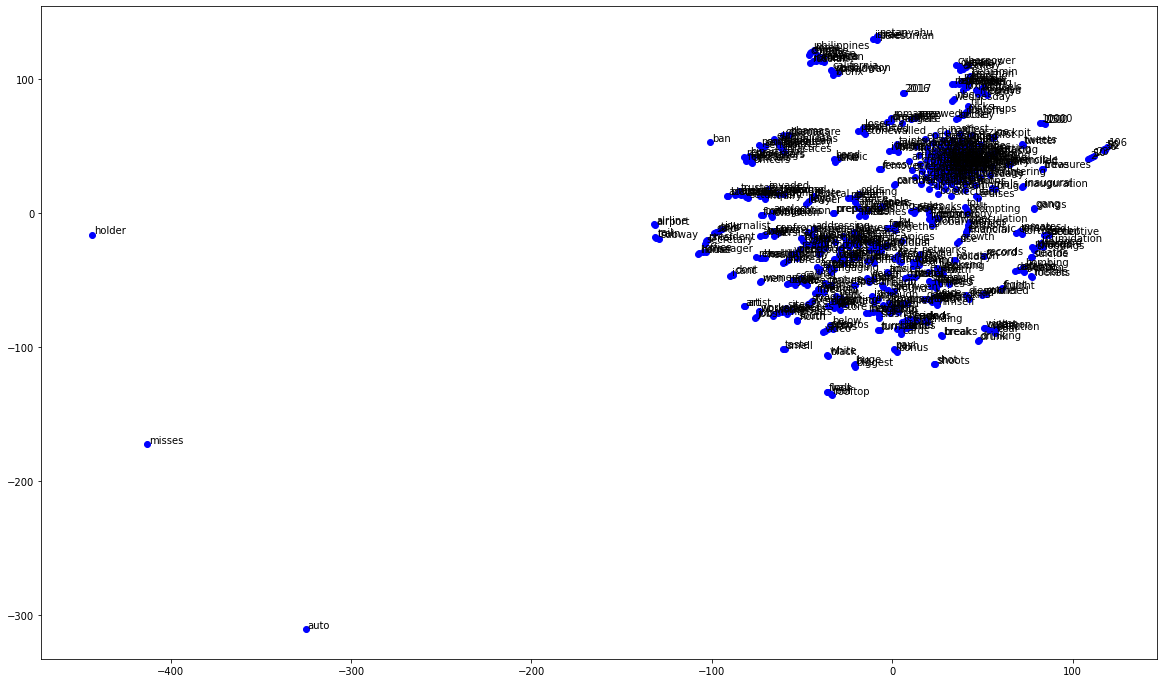

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(20, 12))
plt.scatter(T[:, 0], T[:, 1], c='blue', edgecolors='b')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [24]:
from sklearn.cluster import KMeans

doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in title_df['title'][:100]])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([title_df['title'][:100], cluster_labels], axis=1)

,title,ClusterLabel
0,house republicans fret about winning their hea...,1
1,rift between officers and residents as killing...,1
2,tyrus wong bambi artist thwarted by racial bia...,0
3,among deaths in 2016 a heavy toll in pop music...,2
4,kim jongun says north korea is preparing to te...,0
...,...,...
95,corzine reaches 5 million settlement with regu...,1
96,sears agrees to sell craftsman to stanley blac...,0
97,lirr train that crashed was going over twice s...,2
98,record 2016 for us auto industry long road bac...,2


### References

1. https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa
2. https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py
3. https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py
4. https://arxiv.org/pdf/1610.08229.pdf
5. https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
6. https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92
7. https://towardsdatascience.com/detecting-document-similarity-with-doc2vec-f8289a9a7db7
8. https://radimrehurek.com/gensim/auto_examples/howtos/run_doc2vec_imdb.html#sphx-glr-auto-examples-howtos-run-doc2vec-imdb-py
9. http://projector.tensorflow.org/